# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [2]:
DATA_PATH = './data/'
INSURANCE_DATASET = DATA_PATH + 'data.tsv.gz'
COMPRESSION = 'gzip'

In [3]:
insurance = pd.read_csv(INSURANCE_DATASET, sep = '\t', compression = COMPRESSION, error_bad_lines = False)
insurance.head()

b'Skipping line 2142: expected 11 fields, saw 27\n'


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

* 1) Let's check if there are duplicated policies using `pandas.DataFrame.duplicated` with the parameter "keep" set as 'False' to count all duplicate entries in the dataframe:

In [4]:
duplicated_mask = insurance.duplicated(subset = 'id', keep = False)
print(f'There are {np.sum(duplicated_mask)} duplicates at all in the insurance dataset.')
insurance[duplicated_mask].head()

There are 18 duplicates at all in the insurance dataset.


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
13,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
14,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
332,Sign Bottom,332,1721,30093,30482.0,38315.0,NaN,NaN,NaN,NaN,2
333,Sign Bottom,332,1721,30093,30482.0,38315.0,NaN,NaN,NaN,NaN,2
750,Sign Top,749,101625,148134,135926.0,164660.0,NaN,NaN,NaN,NaN,2


* The dataset contains duplicate policies, therefore we filter these rows using `pandas.DataFrame.drop_duplicates` with the parameter "keep" set as 'first' to remove the duplicates except for the first occurance.

In [5]:
print('The number of rows in the insurance dataframe before filtering:', insurance.shape[0])
insurance = insurance.drop_duplicates(subset = ['id'], keep = 'first')
print('The number of rows in the insurance dataframe after filtering:', insurance.shape[0])

The number of rows in the insurance dataframe before filtering: 13497
The number of rows in the insurance dataframe after filtering: 13488


* 2) Here we confirm that the number of motorcycles recorded in the baseline contracts corresponds to the number of motorcycles in the updated contracts.<br>
Therefore, for each insurance we retrieve four baseline and four updated contracts independently and then compare each respective `baseline_motocycles` and `updated_motorcycles` pair (from NaN and not NaN point of view) in order to figure out anomalous rows.

In [6]:
anomalous_rows = insurance.apply(lambda x:
                                 np.sum(pd.isnull(x.iloc[2:9:2].values) != pd.isnull(x.iloc[3:10:2].values)),
                                 axis = 1)
anomalous_rows = insurance.loc[anomalous_rows.values != 0]

if anomalous_rows.empty:
    print('All policies keep the number of motorcycles from the previous contract.')
else:
    print('The policies that don\'t keep the number of motorcycles from the previous contract.')
    anomalous_rows.head()

All policies keep the number of motorcycles from the previous contract.


* Here we confirm that the number of odometer readings for each contract is the same as the number stated in the `motorcycle_count` variable.<br>
Therefore, for each insurance we retrieve four baseline contracts, count the number of values that are not equal to NaN and then subtract `motorcycle_count`. The policies for which the subtraction result is not equal to 0 (the number of motocycles does not match to `motorcycle_count`) are considered as anomalies.

In [7]:
anomalous_rows = insurance.apply(lambda x: np.sum(pd.notnull(x.iloc[2:9:2].values)) - x['motorcycle_count'], axis = 1)
anomalous_rows = insurance.loc[anomalous_rows.values != 0]

if anomalous_rows.empty:
    print('The number of odometer readings for each contract is the same as in the motorcycle_count variable.')
else:
    print('The policies for which the number of odometer readings is not equal to the motorcycle_count variable.')
    anomalous_rows.head()

The number of odometer readings for each contract is the same as in the motorcycle_count variable.


* 3) The mean and the median value of each column related to kilometrages:

In [8]:
kilometr_stats = insurance.iloc[:, 2:10].agg(['mean', 'median'])
kilometr_stats.style.format('{:.2f}')

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,741399762819413.75,741399762844457.50,67325.97,92277.63,67657.32,92849.41,67827.98,93374.28
median,56341.50,82397.50,56157.50,82061.00,58821.00,85645.00,68181.00,93387.50


* The values obtained are not plausible: for `baseline_motorcycle1` and `update_motorcycle1` we have mean values of the order of $\sim 10^{14}$. It is hard to imagine a real motocycle that would achive such an odometer kilometrage.

* Let's visualize the distribution of the data and remove any extreme outliers.<br>*We will start with visualizing the data distribution using the box plot two times: for the extreme outliers detection and then for the distribution representation after the extreme outliers removal.*

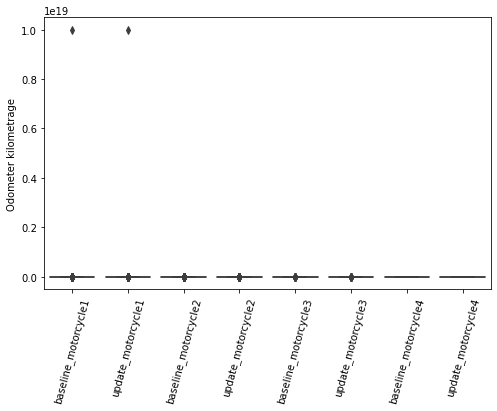

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(data = insurance.iloc[:, 2:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
ax.set_ylabel('Odometer kilometrage')
plt.show()

* The extreme outliers seem to have value of odometer kilometrage $\sim 10^{19}$. We will get rid of these policies:

In [10]:
anomalous_rows = insurance.index[(insurance.iloc[:, 2:10] > 10 ** 18).any(axis = 1)]
insurance.loc[anomalous_rows].head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
91,Sign Bottom,8888888,36112,9999999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,1
13228,Sign Bottom,13451,9999999999999999999,1623780,62221.0,99143.0,NaN,NaN,NaN,NaN,2


* The improvement after the extreme outliers removal:

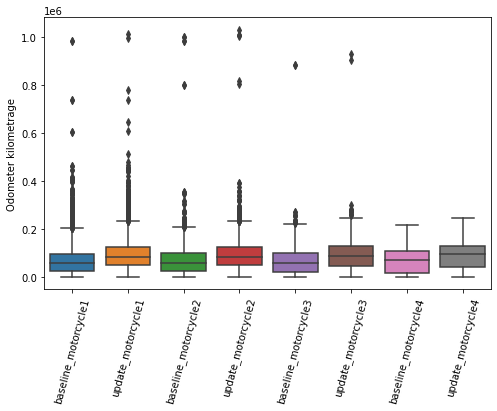

In [11]:
insurance = insurance.drop(labels = anomalous_rows, axis = 0)

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(data = insurance.iloc[:, 2:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
ax.set_ylabel('Odometer kilometrage')
plt.show()

In [12]:
kilometr_stats = insurance.iloc[:, 2:10].agg(['mean', 'median'])
kilometr_stats.style.format('{:.2f}')

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,67345.12,92275.01,67326.87,92276.42,67657.32,92849.41,67827.98,93374.28
median,56341.50,82382.00,56157.00,82056.00,58821.00,85645.00,68181.00,93387.50


* Here we can notice the first oddity of our dataset: we have a different amount of outliers for each of the four motorcycle columns after extreme outliers removal, but the average of all baseline columns is almost the same and the average of all update columns is almost equal.

* The box plot allows us to see that medians, quartiles and extremes of the characteristics lie relatively in the same range.<br>
Another visualization of the data distribution in order to help us with further processing:

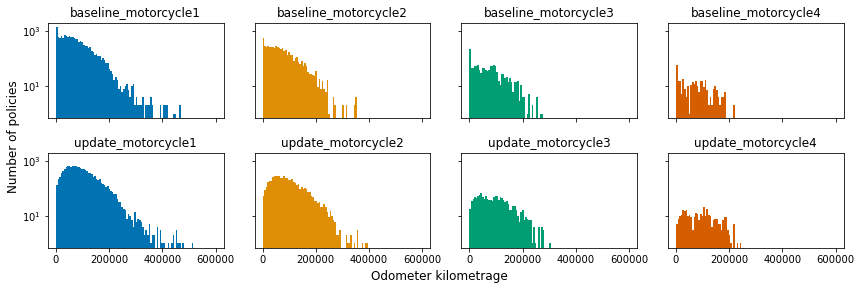

In [13]:
fig, ax = plt.subplots(2, 4, figsize = (12, 4), sharex = True, sharey = True)
clr_palette = sns.color_palette('colorblind', n_colors = 4)

for i in range(4):
    ax[0, i].hist(insurance['baseline_motorcycle' + str(i + 1)], bins = 100, range = [0, 0.6 * 10 ** 6], color = clr_palette[i])
    ax[0, i].set_title('baseline_motorcycle' + str(i + 1))
    ax[1, i].hist(insurance['update_motorcycle' + str(i + 1)], bins = 100, range = [0, 0.6 * 10 ** 6], color = clr_palette[i])
    ax[1, i].set_title('update_motorcycle' + str(i + 1))
    plt.yscale('log')

fig.tight_layout(pad = 1.5)
fig.text(0.5, 0, 'Odometer kilometrage', ha = 'center', size = 'large')
fig.text(0, 0.5, 'Number of policies', va = 'center', size = 'large', rotation = 90)
plt.show()

* The histograms allow us to compare the distributions respectively according to the number of policies in each interval of the range in order to see general changes. 

* 4) **Discussion**: According to the implausible mean values obtained above, we have no doubt that in cases where you cannot think of appropriate ways to remove outliers, it is reasonable to prefer summarizing numerical data with outliers using the median as a representative statistic. The fact is, large values of outliers skew up the mean value, therefore it will not tell us anything about the central tendency of the data, whereas the median is a robust measure which is not affected by outliers since it represents the middle in a sorted (ascending or descending) list of values.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy **or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

* 1) Here we create new columns: baseline_average, update_average, and diff_average. And show them.

In [14]:
insurance['baseline_average'] = insurance.iloc[:, 2:9:2].mean(axis = 1)
insurance['update_average'] = insurance.iloc[:, 3:10:2].mean(axis = 1)
insurance['diff_average'] = insurance['update_average'] - insurance['baseline_average']
insurance.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


* 2) **Discussion**: Another way of aggregating distinct motorcycles from a single policy is to calculate the difference between the updated value and the baseline value for each motorcycle and then create a column with the minimum of these differences for each policy.<br>
This aggregation may be better than taking the average for the purpose of comparing the two scenarios in the study because in that case we can analyse the minimum distance traveled by a customer's motorcycle, stated in an updated contract. We can check whether there are any negative numbers in that new column. In that case customer obviously lied and that is what we need to know to compare the two scenarios in the study.

* 3) Here we plot the distribution of motorcycles per policy in the data. The plot shows the share of policies with the stated number of insured motorcycles. We can see what part of the total amount of policies includes the stated amount of insured motorcycles.

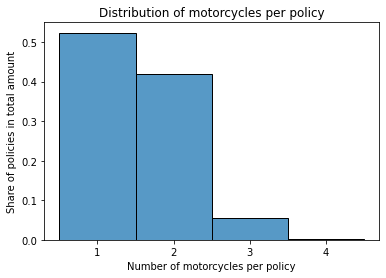

In [15]:
sns_plot = sns.histplot(insurance['motorcycle_count'], discrete = True, stat = 'density')
sns_plot.set_xticks([1, 2, 3, 4])
plt.xlabel('Number of motorcycles per policy')
plt.ylabel('Share of policies in total amount')
plt.title('Distribution of motorcycles per policy');
plt.show()

* We can see that the majority of customers get an insurance for only one motorcycle. At the same time, more that 40% of customers have 2 motorcycles. And less than 10% of customers bought an insurance for more than 2 motorcycles. 

* 4) Here we calculate the mean and the standard deviation of the average kilometrage for each policy for the updated contract.

In [16]:
update_average_stats = insurance.update_average.agg(['mean', 'std'])

print('The mean and std of the average kilometrage for each policy for the updated contract:\n')
print(update_average_stats)

The mean and std of the average kilometrage for each policy for the updated contract:

mean    92166.980090
std     52212.864277
Name: update_average, dtype: float64


* 5) Here we calculate the mean and the standard deviation of the kilometrage per motorcycle in the updated contract, considering only policies with 4 motorcycles insured. Firstly, we select rows of policies with 4 motorcycles insured. Secondly, we concatenate columns related to the updated contract using function `pandas.concat`, so we can work with all motorcycles simultaneously. And, finally, we calculate the mean and the standard deviation values.

In [17]:
rows_with_4_motorcycles = insurance.loc[insurance['motorcycle_count'] == 4]
rows_with_4_motorcycles.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
667,Sign Bottom,666,58826,73695,244390.0,258090.0,122407.0,172259.0,176373.0,181853.0,4,150499.00,171474.25,20975.25
808,Sign Bottom,806,10991,54484,145902.0,169544.0,176424.0,200676.0,148268.0,175073.0,4,120396.25,149944.25,29548.00
1140,Sign Bottom,1137,50350,56530,18421.0,25406.0,27714.0,63904.0,64784.0,81011.0,4,40317.25,56712.75,16395.50
1382,Sign Top,1378,128392,143297,124477.0,137163.0,87000.0,128668.0,14255.0,36553.0,4,88531.00,111420.25,22889.25
2005,Sign Top,1999,1053,33805,134778.0,146708.0,175000.0,196685.0,132000.0,140345.0,4,110707.75,129385.75,18678.00


In [18]:
kilometrage_per_motorcycle = pd.concat([rows_with_4_motorcycles.update_motorcycle1,
                                        rows_with_4_motorcycles.update_motorcycle2,
                                        rows_with_4_motorcycles.update_motorcycle3,
                                        rows_with_4_motorcycles.update_motorcycle4])
kilometrage_per_motorcycle_stats = kilometrage_per_motorcycle.agg(['mean', 'std'])

print('The mean and std of the kilometrage per motorcycle in the updated contract for policies with 4 motorcycles:\n')
print(kilometrage_per_motorcycle_stats)

The mean and std of the kilometrage per motorcycle in the updated contract for policies with 4 motorcycles:

mean    113443.863636
std      83148.461506
dtype: float64


* 6) **Discussion**: This decision of getting one data point per policy or one data point per motorcycle in the dataset can significantly influence the results of the study. We can see that in the situation when we have one data point per policy the mean value (as well as the standard deviation) of the average kilometrage for the updated contract is much smaller than in the situation when we have one data point per motorcycle. Customers can lie about one of their motorcycles while writing true values for other. And we will not notice that, if we analyse only average values for each policy.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

* 1.a) Here we calculate the mean and the standard deviation of the average kilometrage in policies where the signing was done at the bottom, considering the updated contracts.

In [19]:
av_up_kilometrage_bottom = insurance.loc[insurance['condition'] == 'Sign Bottom']
av_up_kilometrage_bottom_stats = av_up_kilometrage_bottom.update_average.agg(['mean', 'std'])

print('The mean and std of the average kilometrage in policies signed at the bottom (the updated contracts):\n')
print(av_up_kilometrage_bottom_stats)

The mean and std of the average kilometrage in policies signed at the bottom (the updated contracts):

mean    98692.362262
std     51928.181550
Name: update_average, dtype: float64


* 1.b) Here we calculate the mean and the standard deviation of the average kilometrage in policies where the signing was done at the top, considering the updated contracts.

In [20]:
av_up_kilometrage_top = insurance.loc[insurance['condition'] == 'Sign Top']
av_up_kilometrage_top_stats = av_up_kilometrage_top.update_average.agg(['mean', 'std'])

print('The mean and std of the average kilometrage in policies signed at the top (the updated contracts):\n')
print(av_up_kilometrage_top_stats)

The mean and std of the average kilometrage in policies signed at the top (the updated contracts):

mean    85794.618753
std     51704.289078
Name: update_average, dtype: float64


* Here we plot the two kilometrage distributions.

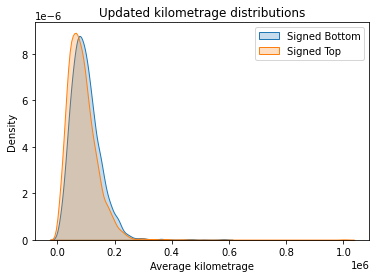

In [21]:
sns.kdeplot(av_up_kilometrage_bottom.update_average, shade = True, label = 'Signed Bottom')
sns.kdeplot(av_up_kilometrage_top.update_average, shade = True, label = 'Signed Top')
plt.title('Updated kilometrage distributions')
plt.xlabel('Average kilometrage')
plt.legend()
plt.show()

* 2) Here we determine whether the difference between the two scenarios is statistically significant using `scipy.stats.ttest_ind()` function.

In [22]:
stats.ttest_ind(av_up_kilometrage_bottom.update_average, av_up_kilometrage_top.update_average)

Ttest_indResult(statistic=14.452368101354606, pvalue=5.435352130291242e-47)

* Bearing in mind, that the p-value of the ttest for these two distributions is much smaller than 0.05, we can conclude that the difference between the two scenarios is statistically significant.

* 3) **Discussion**: No, signing at the top doesn't decrease dishonesty, according to the previous results, because we see that the mean value of the average kilometrage in policies where the signing was done at the top is smaller than the mean value of the average kilometrage in policies where the signing was done at the bottom. It means that customers, who signed at the end of a document, reported larger numbers as their morcycles' kilometrage than those who signed at the beginning. So, it is possible that people, who signed at the beginning, were more dishonest. 

* 4) **Discussion**: No, we wouldn't expect any differences between the average values between sign at the top vs. sign at the bottom conditions for the baseline contract, if everyone signed at the bottom. That condition could influence only the average values in the updated documents, because the circumstances for all customers were the same. That is why, the distributions of the average kilometrage for these two groups of baseline contracts should be the same.

* 5) Here we calculate the mean and the standard deviation of the average kilometrage in policies where the signing was done at the bottom, considering the baseline contracts.

In [23]:
av_base_kilometrage_bottom = insurance.loc[insurance['condition'] == 'Sign Bottom']
av_base_kilometrage_bottom_stats = av_base_kilometrage_bottom.baseline_average.agg(['mean', 'std'])

print('The mean and std of the average kilometrage in policies signed at the bottom (the baseline contracts):\n')
print(av_base_kilometrage_bottom_stats)

The mean and std of the average kilometrage in policies signed at the bottom (the baseline contracts):

mean    75020.747098
std     50256.586376
Name: baseline_average, dtype: float64


* Here we calculate the mean and the standard deviation of the average kilometrage in policies where the signing was done at the top, considering the baseline contracts.

In [24]:
av_base_kilometrage_top = insurance.loc[insurance['condition'] == 'Sign Top']
av_base_kilometrage_top_stats = av_base_kilometrage_top.baseline_average.agg(['mean', 'std'])

print('The mean and std of the average kilometrage in policies signed at the top (the baseline contracts):\n')
print(av_base_kilometrage_top_stats)

The mean and std of the average kilometrage in policies signed at the top (the baseline contracts):

mean    59696.234696
std     49956.317151
Name: baseline_average, dtype: float64


* Here we plot the two kilometrage distributions.

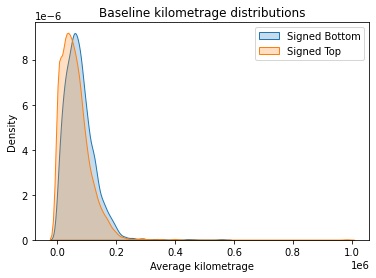

In [25]:
sns.kdeplot(av_base_kilometrage_bottom.baseline_average, shade = True, label = 'Signed Bottom')
sns.kdeplot(av_base_kilometrage_top.baseline_average, shade = True, label = 'Signed Top')
plt.title('Baseline kilometrage distributions')
plt.xlabel('Average kilometrage')
plt.legend()
plt.show()

* 6) Here we determine whether the difference between the two scenarios is statistically significant using `scipy.stats.ttest_ind()` function.

In [26]:
stats.ttest_ind(av_up_kilometrage_bottom.baseline_average, av_up_kilometrage_top.baseline_average)

Ttest_indResult(statistic=17.75773299430071, pvalue=9.333114026345824e-70)

* Now we can see that the difference between these two scenarios is also statistically significant (p-value < 0.05). However, we already know that it shouldn't be like that (see 4.4). That fact is suspicious for us. One of the possible scenario is that the insurance company didn’t randomize the different forms. Here we make our first hypothesis: the forms with signing on top or bottom were distributed based on the previous odometer kilometrage.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

* 1) Here we plot the distribution of odometer kilometrage reported for the first motorcycle insured in each policy.

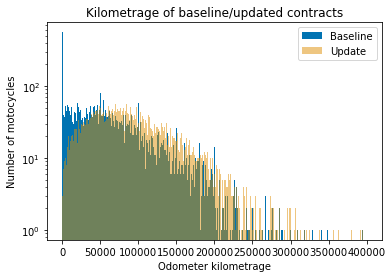

In [27]:
plt.hist(insurance['baseline_motorcycle1'], bins = 1000, alpha = 1, range = [0, 0.4 * 10 ** 6], label = 'Baseline', color = clr_palette[0])
plt.hist(insurance['update_motorcycle1'], bins = 1000, alpha = 0.5, range = [0, 0.4 * 10 ** 6], label = 'Update', color = clr_palette[1])
plt.legend(loc = 'upper right')
plt.xlabel('Odometer kilometrage')
plt.ylabel('Number of motocycles')
plt.title('Kilometrage of baseline/updated contracts')
plt.yscale('log')
plt.show()

* From this plot, we observe that there are noticeable peaks on round numbers such as 0, 50000, 100000 for baseline kilometrages, which is natural because people tend to report round numbers. At the same time, we can’t observe such peaks for updated kilometrages, that makes us doubt the authenticity of the updated contracts data.

* 2) Here we plot the difference between the number of kilometers reported in the baseline and in the updated contract.

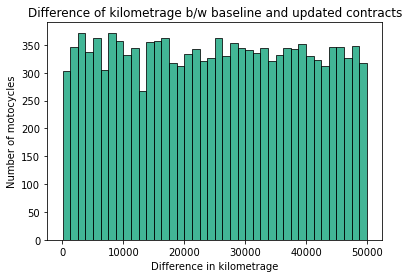

In [28]:
difference_motorcycle1 = insurance['update_motorcycle1'] - insurance['baseline_motorcycle1']

diff_moto1 = sns.histplot(difference_motorcycle1.values, bins = 40, color = clr_palette[2])
diff_moto1.set_xlabel('Difference in kilometrage')
diff_moto1.set_ylabel('Number of motocycles')
plt.title('Difference of kilometrage b/w baseline and updated contracts')
plt.show()

* This plot is absolutely suspicious, we observe that the distribution of kilometrage difference between baseline and updated contracts is obviously uniform, but it shouldn't be so. Right now we can almost be sure that the updated kilometrage data is fabricated. 

* 3) **Discussion**: We assume that the differences between the odometer kilometrage values in the updated and baseline contracts should follow a right-skewed distribution or normal distribution due to the nature of their origin. Physical quantities, such as the distance traveled by one motorcycle during the year, that are expected to be the sum of many independent processes, such as distances of different motorcycle trips, often have distributions that are nearly normal. However, we can see that in our case it is uniformly distributed, which makes us doubt the reliability of the data source. Based on this, we make our second hypothesis that the data for updated odometer readings was created from baseline odometer readings by adding a uniformly distributed random variable. Another observation implies that for the baseline contract histogram, the most noticeable peaks are on the round numbers such as 0, 50000, 100000, and so on. This indicates that some insurance holders tended to round their odometer kilometrage to smaller round numbers when they reported the readings before the dishonesty experiment. However, we can’t observe the peaks of this kind in updated kilometrages, which supports our hypothesis mentioned above.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

* 1) Here we plot the distribution of occurrences of the last three digits of baseline kilometrage and updated kilometrage.

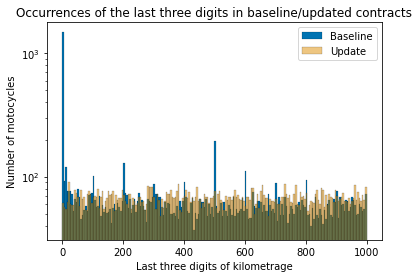

In [29]:
last_digits_baseline = insurance['baseline_motorcycle1'].apply(lambda x: x % 1000)
last_digits_updated = insurance['update_motorcycle1'].apply(lambda x: x % 1000)

sns.histplot(last_digits_baseline.values, bins = 200,alpha = 1, label = 'Baseline', color = clr_palette[0])
sns.histplot(last_digits_updated.values, bins = 200,alpha = 0.5, label = 'Update', color = clr_palette[1])
plt.legend(loc = 'upper right')
plt.xlabel('Last three digits of kilometrage')
plt.ylabel('Number of motocycles')
plt.title('Occurrences of the last three digits in baseline/updated contracts')
plt.yscale('log')
plt.show()

* 2) **Discussion:** For updated kilometrage, the distribution of occurrences of the last three digits is more uniform. While for baseline kilometrage, occurrences of the last three digits, which is a round number (0,100,200,...), are significantly higher.

* 3) **Discussion:** Hypothesis: When declaring the odometer kilometrage, the customers tend to report a smaller number of kilometrage rounding it to the closest thresholds of particular insurance tariffs.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

* 1) Here we merge the `insurance` dataframe and `font` column as `insurance_font` by using `merge` function.

In [30]:
FONTS_DATASET = DATA_PATH + 'fonts.csv'

fonts = pd.read_csv(FONTS_DATASET)
insurance_font = pd.merge(insurance, fonts, on = 'id')
insurance_font.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


* 2.a) Here we count the number of rows with Arial and Helvetica font respectively and find that they nearly have the same quantities.

In [31]:
insurance_font['font'].value_counts()

Arial        6744
Helvetica    6742
Name: font, dtype: int64

* 2.b) Here we sort out baseline kilometers of motorcycle1 for rows with the Arial font and for rows with the Helvetica font.

In [32]:
baseline_arial = insurance_font[insurance_font.font == 'Arial']['baseline_motorcycle1']
baseline_helvetica = insurance_font[insurance_font.font == 'Helvetica']['baseline_motorcycle1']

* Here we use histogram to plot the distribution of baseline kilometers with the Arial and with the Helvetica font respectively.<br>
By comparing the two plots, we can find that these two fonts considering baseline kilometers share very similar distribution especially in low and high numbers of odometer kilometrage.

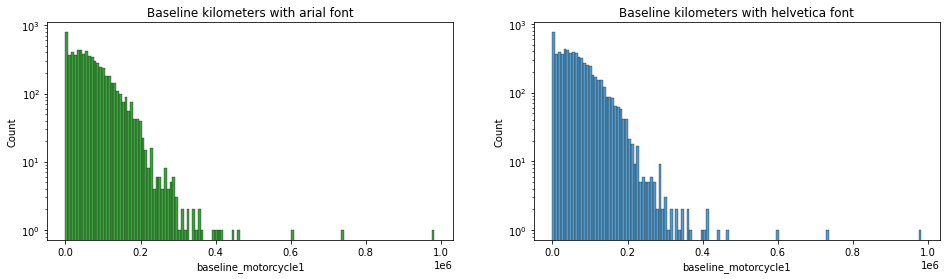

In [33]:
fig, ax = plt.subplots(ncols = 2, figsize = (16, 4))

sns.histplot(baseline_arial, color = 'g', ax = ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Baseline kilometers with arial font')

sns.histplot(baseline_helvetica, ax = ax[1])
ax[1].set_yscale('log')
ax[1].set_title('Baseline kilometers with helvetica font')
plt.show()

* 3) Here we select last three digits of odometer kilometrage in both every baseline and update contract respectively.

In [34]:
lastdigit_baseline = (insurance_font['baseline_motorcycle1'] % 1000)
lastdigit_update = (insurance_font['update_motorcycle1'] % 1000)

* Here we use histogram to plot the distribution of baseline and update kilometers with Arail and Helvetica font.

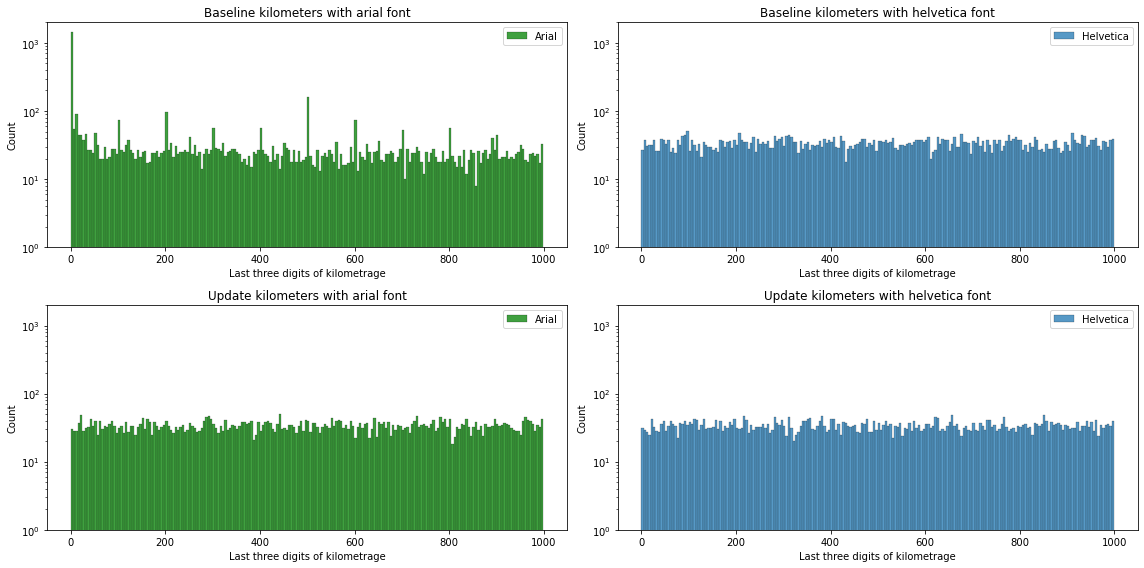

In [35]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8))
        
sns.histplot(lastdigit_baseline[insurance_font.font == 'Arial'], bins = 200, color = 'g', label = 'Arial', ax = ax[0, 0])
sns.histplot(lastdigit_baseline[insurance_font.font == 'Helvetica'], bins = 200, label = 'Helvetica', ax = ax[0, 1])
ax[0, 0].set_title('Baseline kilometers with arial font')
ax[0, 1].set_title('Baseline kilometers with helvetica font')


sns.histplot(lastdigit_update[insurance_font.font == 'Arial'], bins = 200, color = 'g', label = 'Arial', ax = ax[1, 0])
sns.histplot(lastdigit_update[insurance_font.font == 'Helvetica'], bins = 200, label = 'Helvetica', ax = ax[1, 1])
ax[1, 0].set_title('Update kilometers with arial font')
ax[1, 1].set_title('Update kilometers with helvetica font')


for i in range(2):
    for j in range(2):
        ax[i, j].legend()
        ax[i, j].set_yscale('log')
        ax[i, j].set_ylim(1, 2000)
        ax[i, j].set_xlabel('Last three digits of kilometrage')
        
fig.tight_layout()
plt.show()

* **Discussion:** In order to prove the fact that data written with Helvetica font was fabricated, we were suggested to implement one of the most common strategies for identifying counterfeit data - the last three digits distribution analysis. Assuming that the odometer kilometrages written with Arial font are real values provided by people to an insurance company, we can suppose what distribution the last three digits of these readings would have. For the odometer readings that were really reported by the customers to the insurance company, some policy holders tended to lie and they could do it by reporting a smaller number of odometer kilometrage rounding it to the closest threshold of a particular insurance tariff. We can see peaks next to these round values in the “Baseline kilometers with arial font” plot.  At the same time, in order to forge the kilometers which appear to be real, the customers that tended to lie could choose to write numbers considered as “the most random numbers” - the numbers with different digits at the end rather than rounded ones. Since humans are imperfect randomizers, and they are not able to generate random numbers well, the resulting data would be different from data produced by a truly random process. Thus, following the same logic, the uniform distribution of the last three digits for Helvetica font in both baseline and updated cases is suspicious for us. Baseline odometer kilometrages with Arial and with Helvetica font data follow almost the same distributions but the distributions of the last three digits between Arial and Helvetica font are different, therefore, we make our third hypothesis that the values in Helvetica rows were generated by a computer using a random numbers generator. Hence, Helvetica odometer kilometrages couldn’t really be provided by people.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

Dear Principal Investigator,


* According to the conducted analyses, we have explored suspicious features of the data. **Firstly**, the baseline contracts have significant difference in average distribution for signed at the top and bottom subsets (see Task 4.5), whereas they should follow the same distribution theoretically, because no experiment was held that time. **Secondly**, the difference between updated and baseline contracts should follow a normal distribution, whereas in the plot for Task 5.2 it is distributed uniformly. **Thirdly**, we proved that Helvetica rows were fabricated, because the distribution of the last three digits for counterfeit and non-counterfeit data differ. So, we can state that the data has been tampered with.


* We make four hypotheses on how the data has been tampered with. **First hypothesis**: the forms with signing on top/bottom were distributed based on the previous odometer kilometrage. **Second hypothesis**: the updated kilometrage data was created from baseline by adding a uniformly distributed random variable. **Third hypothesis**: the helvetica fabricated values were created by capturing the distribution of arial font data and then generating random numbers by a computer according to this distribution. **Fourth hypothesis**: different quantities and values of outliers were added to the baseline and updated kilometrages of four motorcycles data in order to obtain nearly the same mean value.


* The data doesn’t lead to the fact that signing on top decreases dishonesty. Although customers who signed at the bottom of the contract reported larger numbers than those who signed at the beginning, we can’t come to the conclusion that signing on top decreases dishonesty. Also, we should bear in mind that there shouldn’t be a significant difference between sign at the top and bottom conditions for baseline contracts, therefore, analyzing probably corrupted updated contracts can’t lead to this inference.


Kind regards,

ADA students